<p style="align: center;"><img align=center src="https://cdnb.artstation.com/p/assets/covers/images/060/407/559/large/vahid-ghobadi-arfai-vahid-ghobadi-arfai-lo.jpg?1678483232" width=300 height=320/></p>
<h3 style="text-align: center;"><b>Семинар №10 ФЭФМ МФТИ</b></h3>

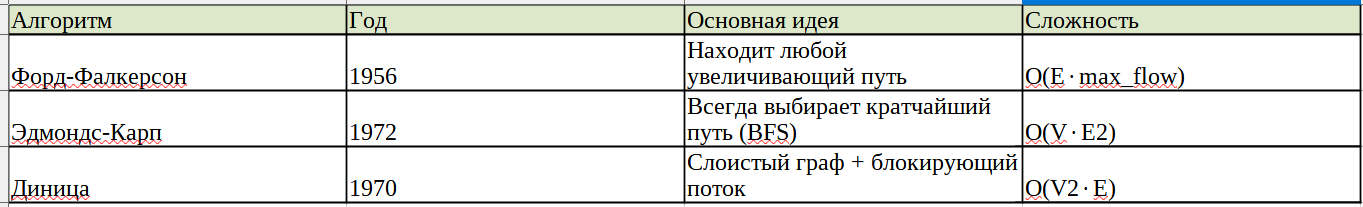

## Алгоритм Хопкрофта-Карпа

Этот алгоритм быстрее, чем Форда-Фалкерсона, потому что использует многократный поиск увеличивающих путей с помощью BFS и DFS, а не один за раз.

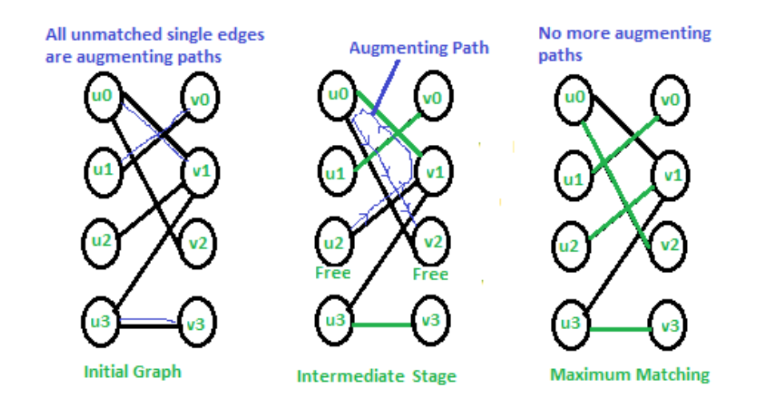

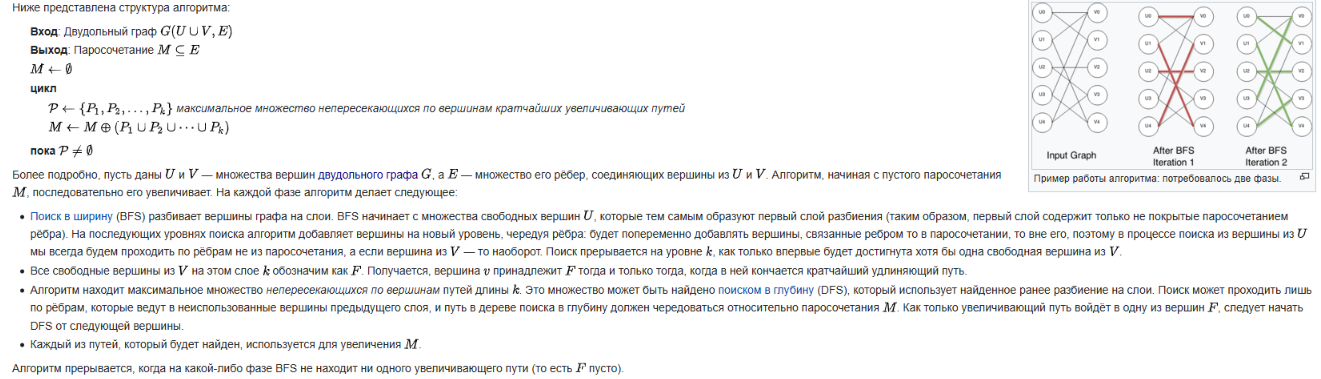

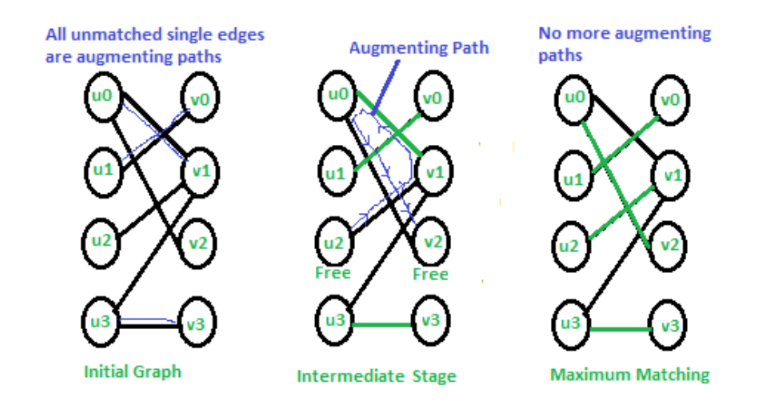

In [ ]:
BFS:

Находит кратчайшие пути из свободных вершин X

Обновляет расстояния до вершин

Возвращает True, если существует путь до стока

DFS:

Рекурсивно ищет увеличивающий путь

Обновляет паросочетание, если путь найден

Основной алгоритм (hopcroftKarpFlow):

Инициализирует паросочетания (pairU, pairV) как пустые

Пока BFS находит увеличивающие пути:

Для каждой свободной вершины X пытается найти увеличивающий путь через DFS

Увеличивает счётчик паросочетаний при успехе

self.residual_graph[u][self.x_size + v] > 0: проверяет, существует ли в остаточной сети (residual_graph) ненулевой поток по ребру из вершины u в X в вершину v в Y.

In [3]:
from collections import deque

INF = float('inf')

class hopcroftKarp:
    def __init__(self, x_size, y_size, edges):
        self.x_size = x_size
        self.y_size = y_size
        self.size = x_size + y_size
        
        self.residual_graph = [[0] * self.size for i in range(self.size)]
        
        for x, y in edges:
            self.residual_graph[x][x_size + y] = 1
        
        
    def bfs(self, dist, pairU, pairV, iteration):
        print(f"\nИтерация {iteration}: BFS строит слоистый граф")
        queue = deque()
        for u in range(self.x_size):
            if pairU[u] == -1:
                dist[u] = 0
                queue.append(u)
                print(f"  Вершина {u} свободна, добавляем в очередь")
            else:
                dist[u] = INF
        
        found_free = False
        while queue:
            print(f"\n Очередь {queue} ")
            u = queue.popleft()
            for v in range(self.y_size):
                if self.residual_graph[u][self.x_size + v] > 0:
                    if pairV[v] == -1:
                        found_free = True
                    else:
                        next_u = pairV[v]
                        if dist[next_u] == INF:
                            dist[next_u] = dist[u] + 1
                            queue.append(next_u)
                            print(f"  Добавляем {next_u} в очередь (из {u} через {v})")
            
        return found_free

    def dfs(self, u, dist, pairU, pairV):
        for v in range(self.y_size):
            if self.residual_graph[u][self.x_size + v] > 0:
                if pairV[v] == -1:
                    pairV[v] = u
                    pairU[u] = v
                    print(f"  Выбрано ребро ({u}, {v})")
                    return True
                else:
                    next_u = pairV[v]
                    if dist[next_u] == dist[u] + 1 and self.dfs(next_u, dist, pairU, pairV):
                        pairV[v] = u
                        pairU[u] = v
                        print(f"  Переназначено ребро ({u}, {v})")
                        return True
        dist[u] = INF
        return False
    
    def hopcroftKarp(self):
        pairU = [-1] * self.x_size
        pairV = [-1] * self.y_size
        dist = [INF] * self.x_size
        
        max_matching = 0
        iteration = 1  
        
        while self.bfs(dist, pairU, pairV, iteration):
            print(f"\nИтерация {iteration}: DFS ищет увеличивающие пути")
            for u in range(self.x_size):
                if pairU[u] == -1 and self.dfs(u, dist, pairU, pairV):
                    max_matching += 1
            iteration += 1
        
        print("\nФинальное паросочетание:")
        for u in range(self.x_size):
            if pairU[u] != -1:
                print(f"  ({u}, {pairU[u]})")
        return max_matching

X_size = 4
Y_size = 4
edges = [(0, 1), (0, 2), (1, 0), (2, 1), (3, 1), (3, 3)]

hk_flow = hopcroftKarp(X_size, Y_size, edges)
print("Максимальное паросочетание:", hk_flow.hopcroftKarp())


Итерация 1: BFS строит слоистый граф
  Вершина 0 свободна, добавляем в очередь
  Вершина 1 свободна, добавляем в очередь
  Вершина 2 свободна, добавляем в очередь
  Вершина 3 свободна, добавляем в очередь

 Очередь deque([0, 1, 2, 3]) 

 Очередь deque([1, 2, 3]) 

 Очередь deque([2, 3]) 

 Очередь deque([3]) 

Итерация 1: DFS ищет увеличивающие пути
  Выбрано ребро (0, 1)
  Выбрано ребро (1, 0)
  Выбрано ребро (3, 3)

Итерация 2: BFS строит слоистый граф
  Вершина 2 свободна, добавляем в очередь

 Очередь deque([2]) 
  Добавляем 0 в очередь (из 2 через 1)

 Очередь deque([0]) 

Итерация 2: DFS ищет увеличивающие пути
  Выбрано ребро (0, 2)
  Переназначено ребро (2, 1)

Итерация 3: BFS строит слоистый граф

Финальное паросочетание:
  (0, 2)
  (1, 0)
  (2, 1)
  (3, 3)
Максимальное паросочетание: 4


# Контест

## Задача D

Вам надо уничтожить такое количество дорог, чтобы образовалось хотя бы два города, проезд между которыми был бы невозможен. 
Вам известна стоимость уничтожения каждой дороги. Найти наименьшую стоимость, необходимую для совершения задуманного.

Формат ввода


В первой строке содержится t -- количество тестов. Первая строка каждого теста содержит количество n (n ≤ 50) городов в стране. Следующие n строк описывают дороги: j-ый символ i-ой строки является цифрой, задающей стоимость уничтожения дороги, ведущей из i-го города в j-ый.

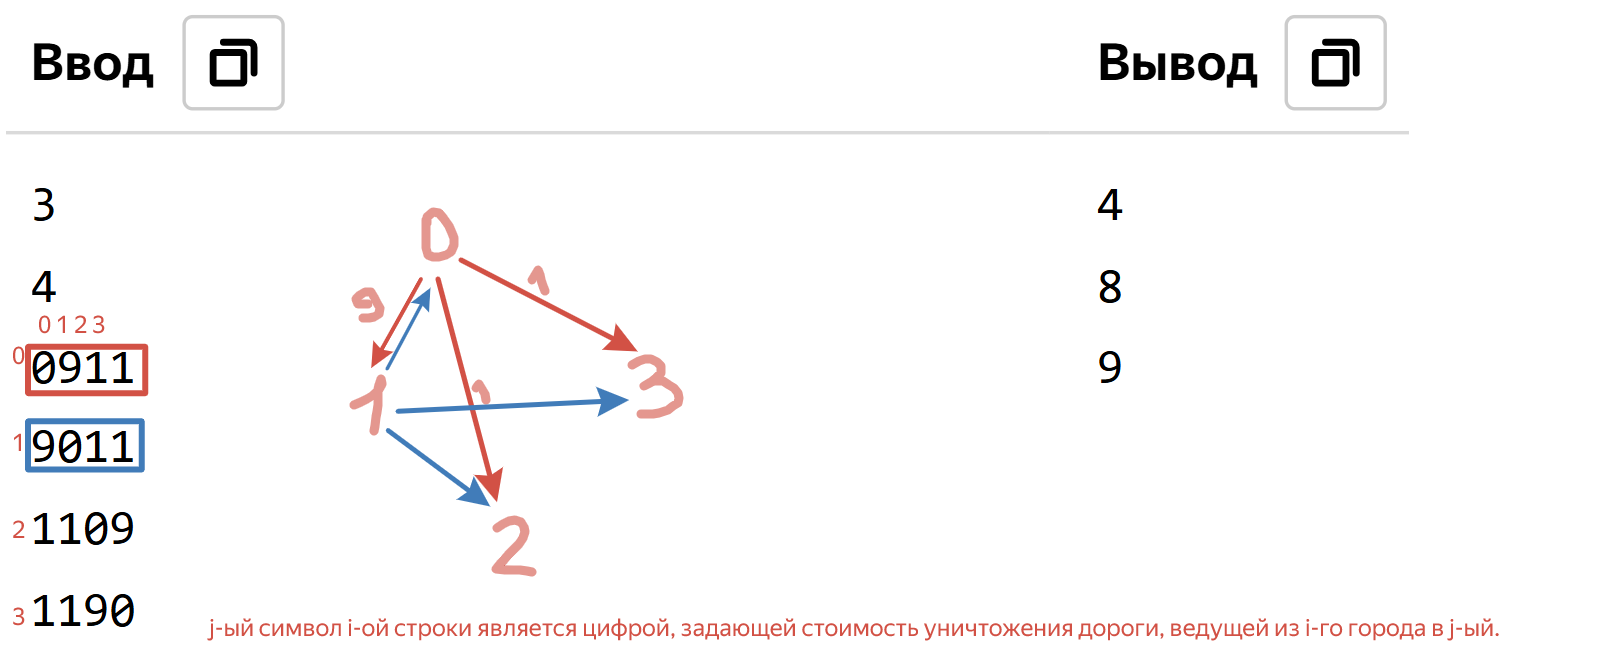

построим все дороги

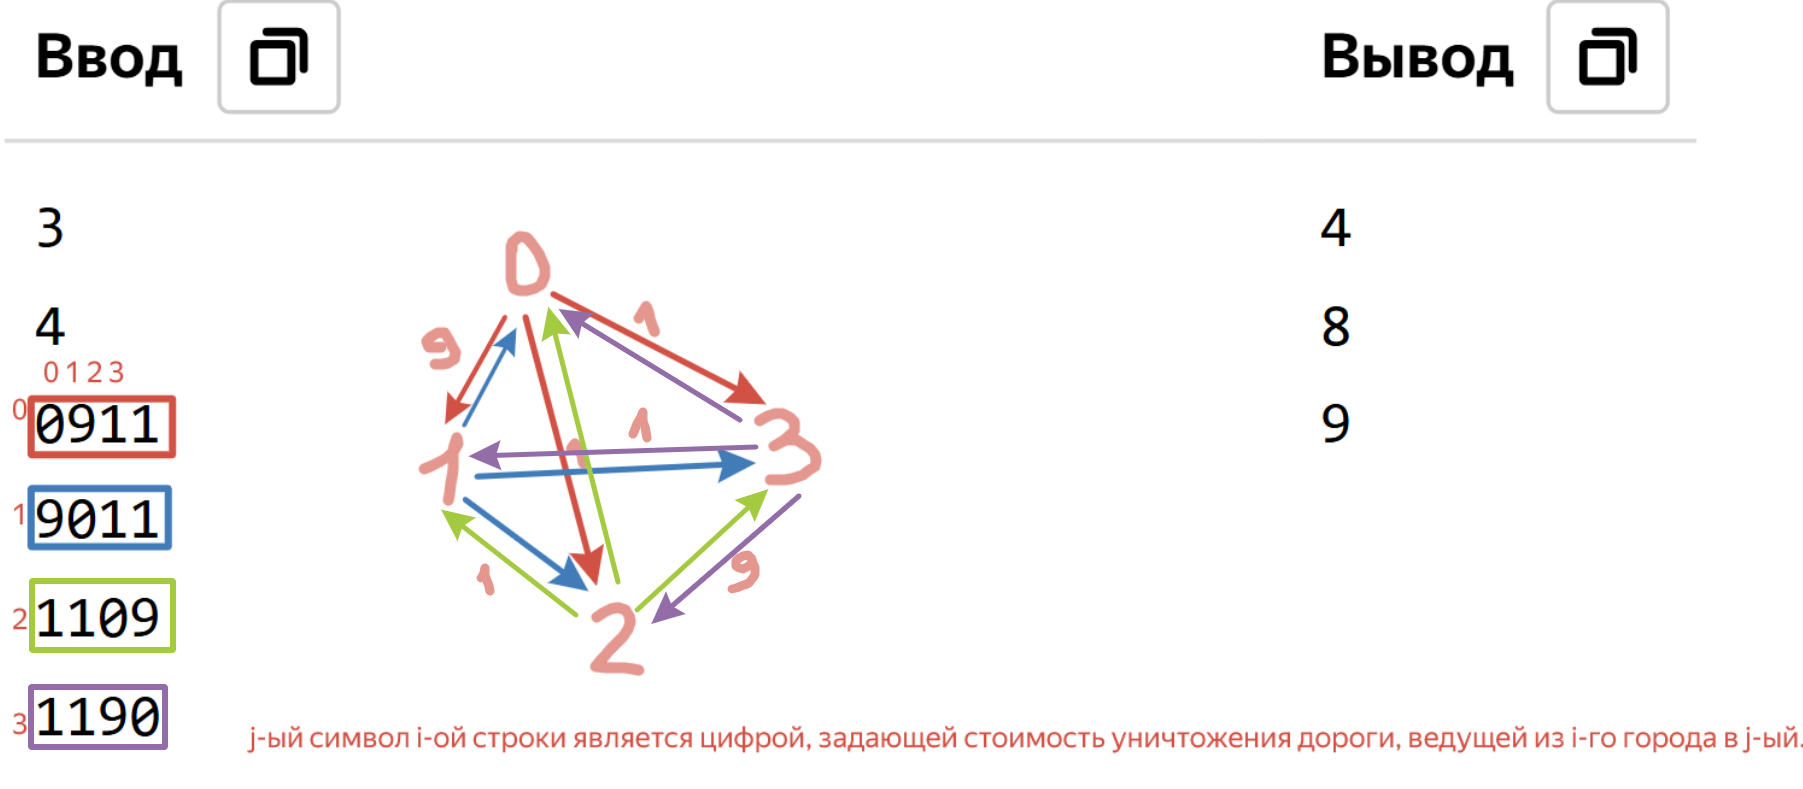

какие дороги нужно разрушить?

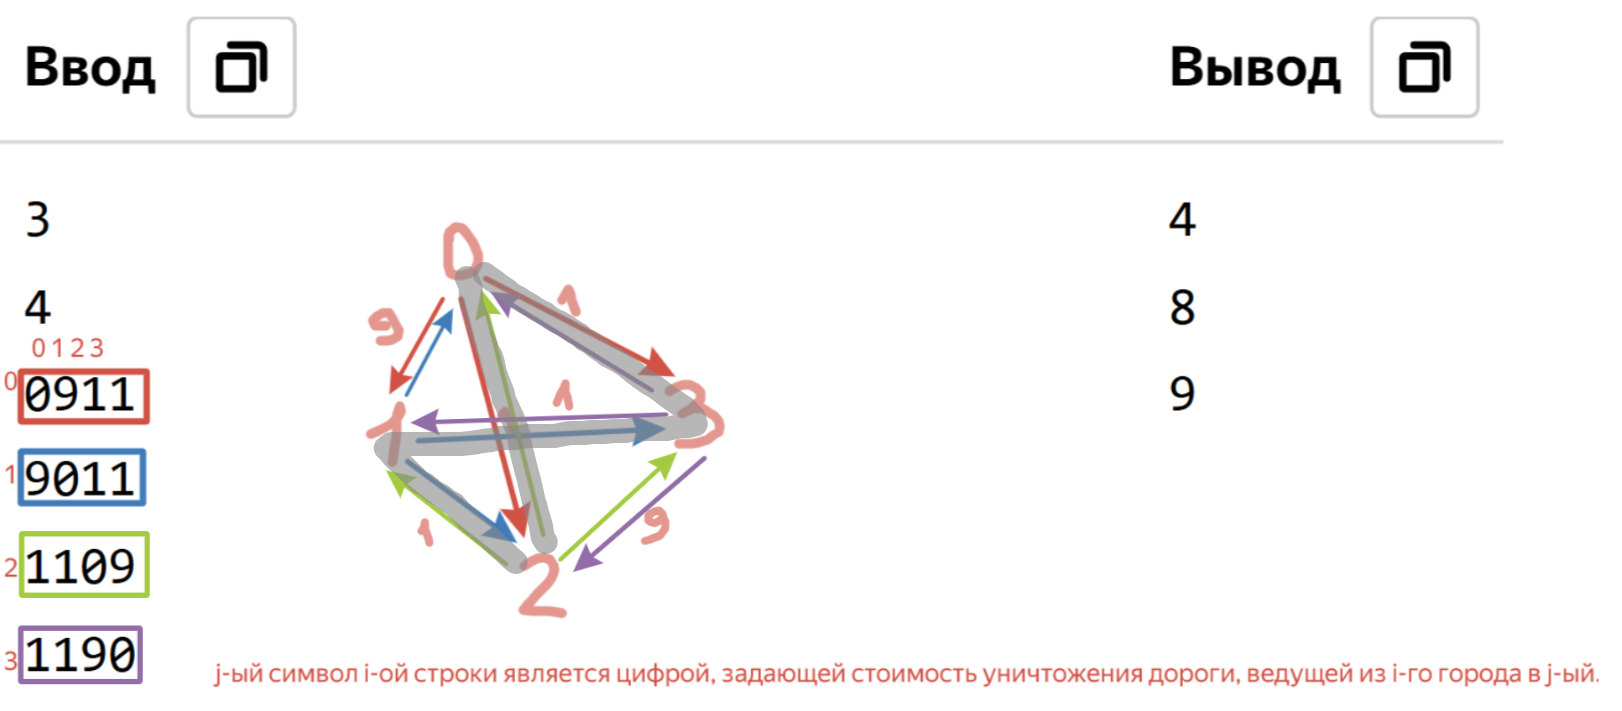

Формат вывода


Для каждого теста вывести в отдельной строке ответ.

### Фактически задача - поиск мостов наименьшего веса - но нет

In [15]:
text = """
3
4
0911
9011
1109
1190
6
030900
304120
040174
911021
027207
004170
4
0399
3033
9309
9390
"""

lines = text.split('\n')

formatted_text = []

for line in lines:
    if  len(line) > 1:
        formatted_line =' '.join([line[i:i+1] for i in range(0, len(line))])
        formatted_text.append(formatted_line)
    else:
        formatted_text.append(line)

print('\n'.join(formatted_text))


3
4
0 9 1 1
9 0 1 1
1 1 0 9
1 1 9 0
6
0 3 0 9 0 0
3 0 4 1 2 0
0 4 0 1 7 4
9 1 1 0 2 1
0 2 7 2 0 7
0 0 4 1 7 0
4
0 3 9 9
3 0 3 3
9 3 0 9
9 3 9 0



## Задача F

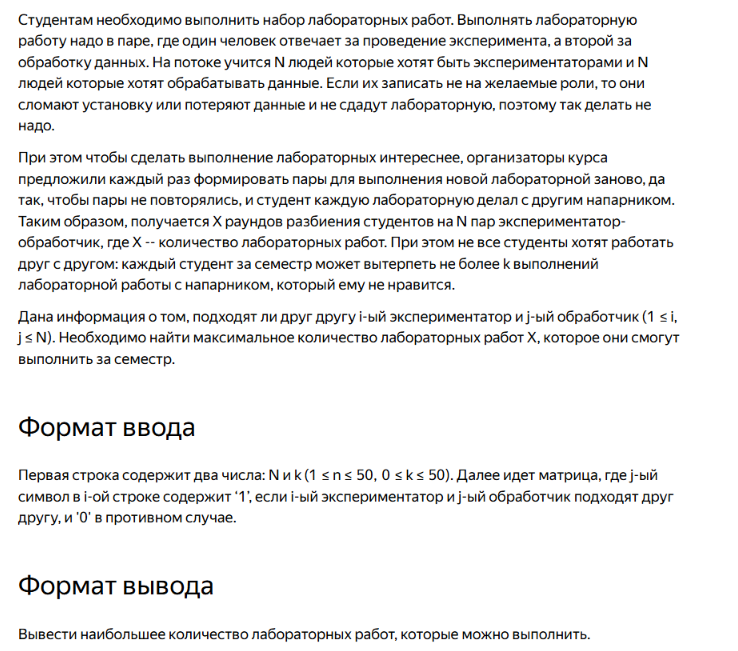

матрица — могут ли i-й экспериментатор и j-й обработчик быть в паре,

k — сколько раз максимум студент может быть в паре с нежелательным напарником.

Нужно найти максимальное количество раундов (X) разбиения на пары так, чтобы в каждом раунде все N студентов были разбиты на пары, пары не повторялись, и каждый студент не работал больше k раз с тем, кто ему не нравится.

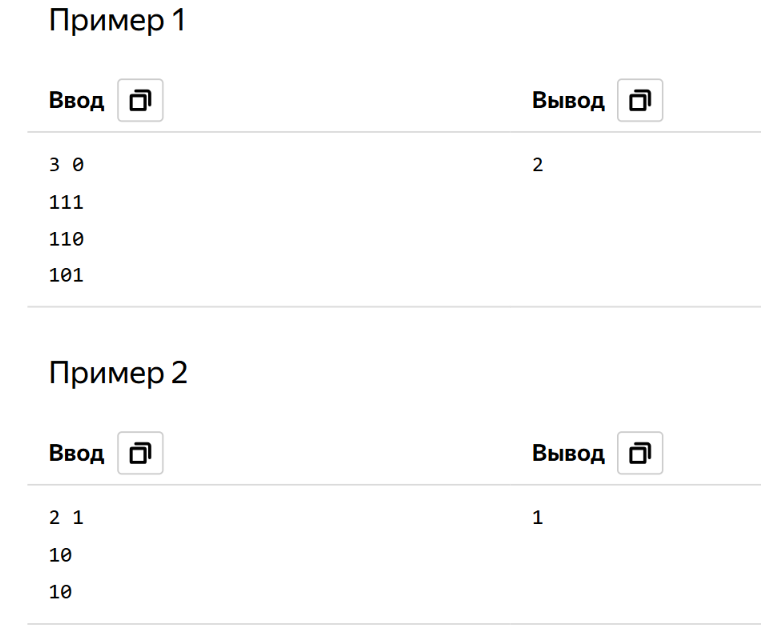

## Задача E

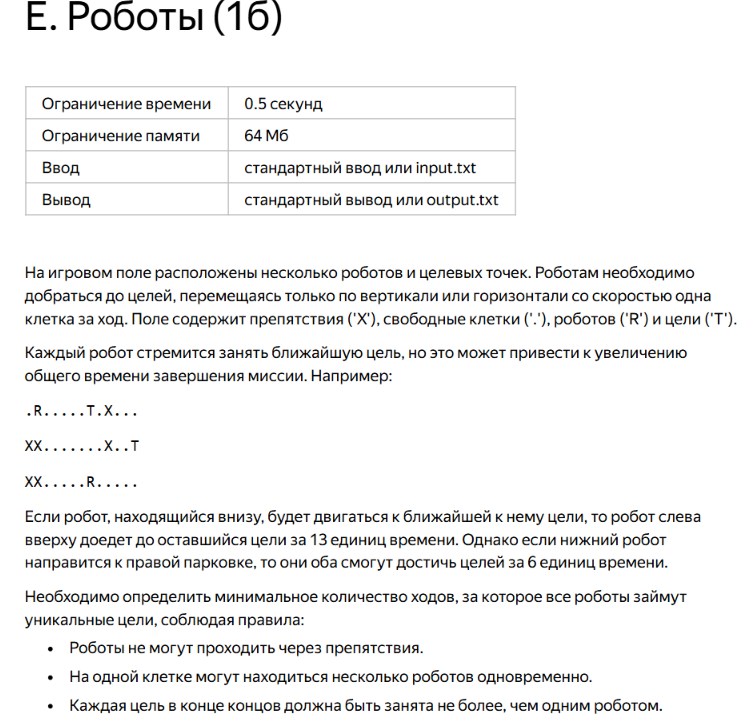

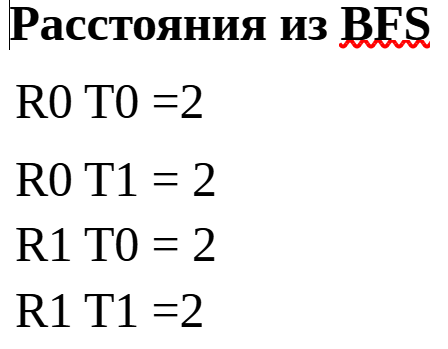

In [ ]:
def bfs(grid, x, y):
    n, m = len(grid), len(grid[0])
    dist = [[-1] * m for i in range(n)]
    queue = [(x, y, 0)]
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    
    for cx, cy, d in queue:
        if dist[cx][cy] == -1:
            dist[cx][cy] = d
            for dx, dy in directions:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < n and 0 <= ny < m and grid[nx][ny] != 'X' and dist[nx][ny] == -1:
                    queue.append((nx, ny, d + 1))
    
    return { (i, j): dist[i][j] for i in range(n) for j in range(m) if grid[i][j] == 'T' }

def max_matching(graph, max_dist):
    matches = {}
    
    def try_match(v, visited):
        for u, d in graph.get(v, []):
            if d > max_dist or u in visited:
                continue
            visited.add(u)
            if u not in matches or try_match(matches[u], visited):
                matches[u] = v
                return True
        return False
    
    return sum(try_match(node, set()) for node in graph)

t = int(input())
for i in range(t):
    rows, cols = map(int, input().split())
    grid = [input().strip() for i in range(rows)]
    robots, targets = [], {}
    
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 'R':
                robots.append((i, j))
            elif grid[i][j] == 'T':
                targets[(i, j)] = len(targets)
    
    graph = {i: [] for i in range(len(robots))}
    for i, (rx, ry) in enumerate(robots):
        distances = bfs(grid, rx, ry)
        for (tx, ty), idx in targets.items():
            if (tx, ty) in distances:
                graph[i].append((idx, distances[(tx, ty)]))
    
    l, r = 0, rows * cols
    while l < r:
        z = (l + r) // 2
        if max_matching(graph, z) < len(robots):
            l = z + 1
        else:
            r = z
            
    print(l if l < rows * cols and l>0 else -1)

 1
 6 11
 XXXXXXXXXXX
 X......XTTX
 XR...T.XTTX
 X......X..X
 X....R....X
 XXXXXXXXXXX


5


# Строки

Префикс — это начало строки. Например, для "abcdef" префиксы:

"a",

"ab",

"abc",

"abcd" и так далее.

Постфикс (чаще говорят суффикс) — это конец строки. Например, для "abcdef" суффиксы:

"f",

"ef",

"def",

"cdef" и так далее до "abcdef"

### Z функция

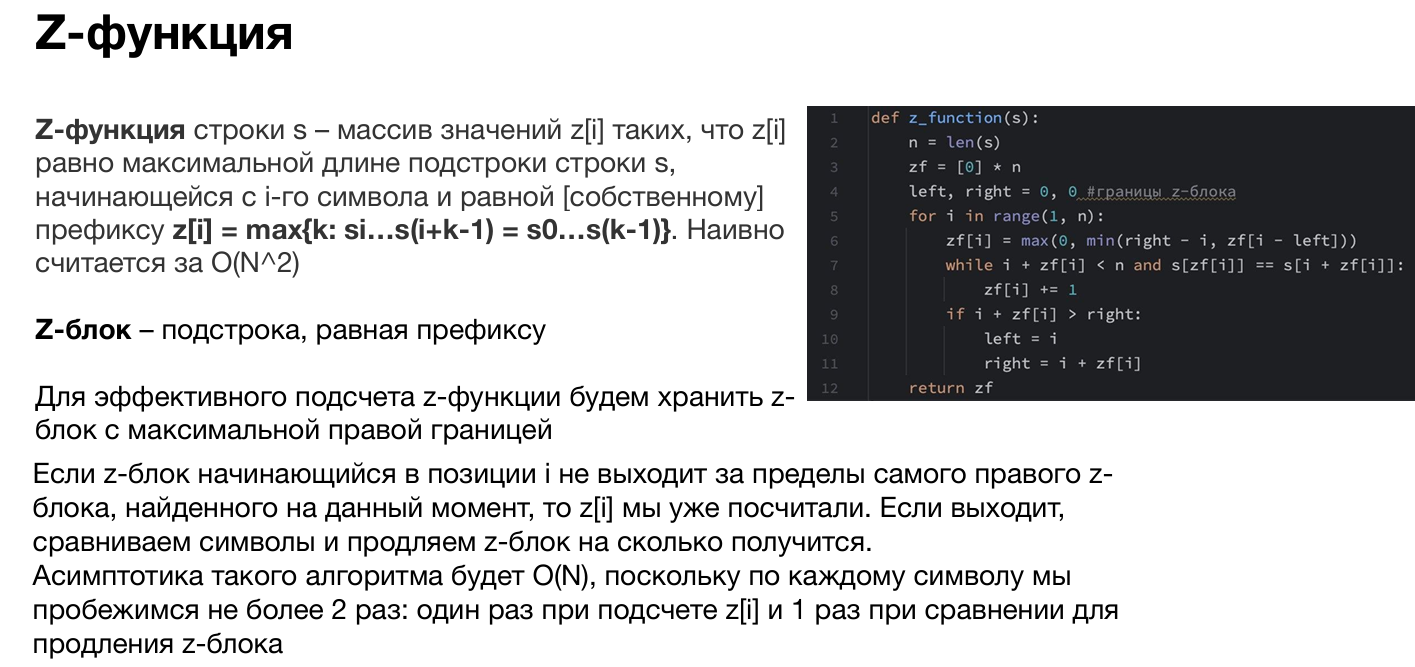

Здесь и далее строки индексируются с нуля, т.е. первый символ строки имеет номер 0
. Также, здесь и далее s[i…j]
 обозначает подстроку строки s
 от i
-го символа до j
-го включительно.

Пусть дана строка s
 длины n
. Тогда Z(s)
 - это массив длины n
, i
-ый элемент которого равен наибольшему числу символов, начиная с позиции i
, совпадающих с первыми символами строки s
.

Иными словами, z[i]
 — это длина наибольшего общего префикса строки s
 и её i
-го суффикса.

Первый элемент Z
-функции, z[0]
, обычно считают неопределённым. Мы будем считать, что он равен нулю (хотя ни в алгоритме, ни в приведённой реализации это ничего не меняет).

Далее будет привиден алгоритм вычисления Z
-функции за время O(n)
, а также различные применения этого алгоритма.

In [41]:
def z_func(s, n):
    z = [0] * n
    l, r = 0, 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

s = "aaabaab"
n = len(s)
print(z_func(s, n))

[0, 2, 1, 0, 2, 1, 0]


In [43]:
s = "aabcaabxaaaz"
n = len(s)
print(z_func(s, n))

[0, 1, 0, 0, 3, 1, 0, 0, 2, 2, 1, 0]


### Поиск подстроки в строке с использованием Z-функции

In [53]:
def z_func(s):
    n = len(s)
    z = [0] * n
    l, r = 0, 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

def search_pattern(text, pattern):
    combined = pattern + "#" + text  # Объединяем паттерн и текст через #
    z = z_func(combined)
    pattern_length = len(pattern)
    result = []

    # Проходим по z-значениям после паттерна и #
    for i in range(pattern_length + 1, len(z)):
        if z[i] == pattern_length:  # Если z[i] == длине паттерна, нашли совпадение
            result.append(i - pattern_length - 1)

    return result

text = "aaabaabaaab"
pattern = "aab"

positions = search_pattern(text, pattern)
print("Паттерн найден в позициях:", positions)

Паттерн найден в позициях: [1, 4, 8]


### Переодичность в строке

Определение периодичности строки с помощью Z-функции основано на том, что если строка имеет период p, то Z[n - p] = p.

In [ ]:
def z_func(s):
    n = len(s)
    z = [0] * n
    l, r = 0, 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

def find_period(s):
    n = len(s)
    z = z_func(s)
    
    for p in range(1, n):  # Проверяем возможные длины периода
        if n % p == 0 and z[p] == n - p:  # Условие на кратность и Z-функцию
            return p
    return n  # Если нет меньшего периода, строка сама себе период

s1 = "ababab"
s2 = "aaaa"
s3 = "abcabcabc"

print(f"Минимальный период '{s1}':", find_period(s1))  
print(f"Минимальный период '{s2}':", find_period(s2)) 
print(f"Минимальный период '{s3}':", find_period(s3))  

gnfjng -  (6, 2)
Минимальный период 'ababab': 2
gnfjng -  (4, 1)
Минимальный период 'aaaa': 1
gnfjng -  (9, 3)
Минимальный период 'abcabcabc': 3


### Префикс функция

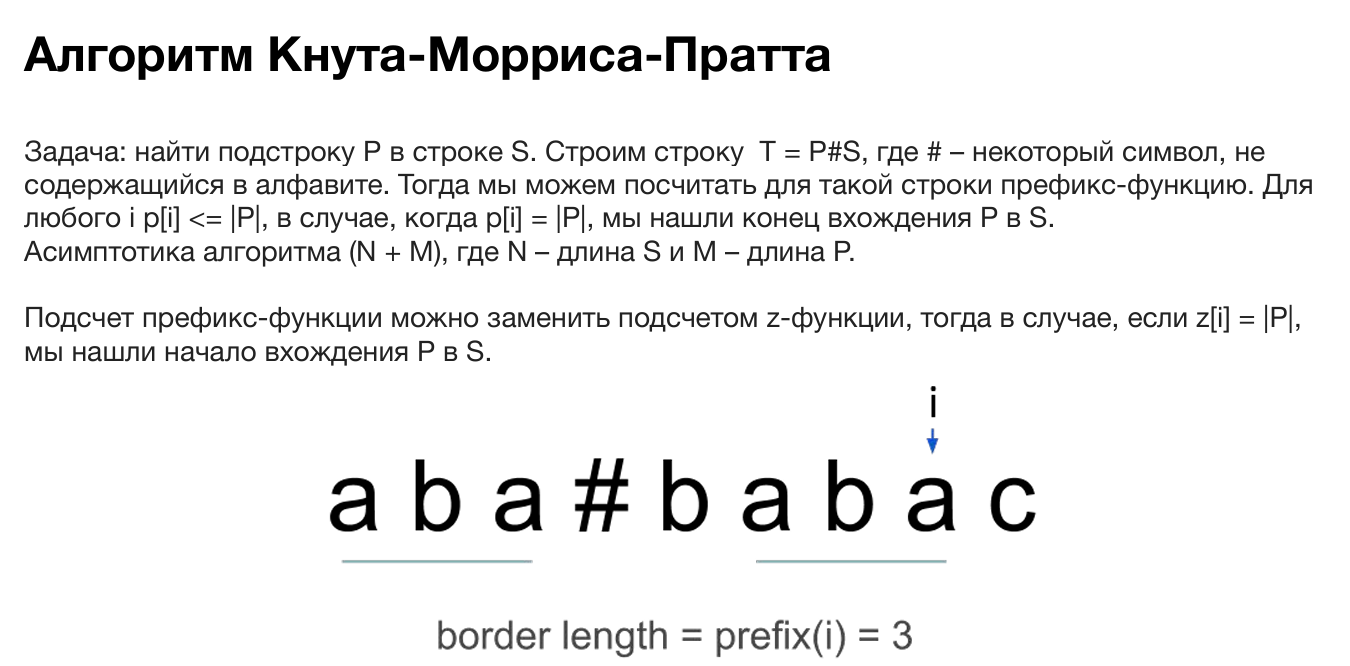

Префикс-функция π[i] для строки s показывает длину наибольшего собственного префикса, который также является суффиксом подстроки s[0:i].

π[2] = 1, потому что "a" совпадает с "a" в начале

π[3] = 2, потому что "ab" совпадает с "ab" в начале

π[4] = 0, потому что "ab" не равно "bc"

In [74]:
def prefix_function(s):
    n = len(s)
    pi = [0] * n  # Массив π-функции
    for i in range(1, n):
        j = pi[i - 1]  # Длина предыдущего префикса-суффикса
        while j > 0 and s[i] != s[j]:  
            j = pi[j - 1]  # Пытаемся уменьшить длину совпадения
        if s[i] == s[j]:  
            j += 1  # Увеличиваем, если нашли совпадение
        pi[i] = j  # Записываем результат
    return pi


s1 = "ababcab"

print(f"prefix_function '{s1}':", prefix_function(s1))  
print(f"z_func '{s1}':", z_func(s1))  

prefix_function 'ababcab': [0, 0, 1, 2, 0, 1, 2]
z_func 'ababcab': [0, 0, 2, 0, 0, 2, 0]


In [72]:
def prefix_function(s):
    n = len(s)
    pi = [0] * n  # Массив π-функции
    for i in range(1, n):
        j = pi[i - 1]  # Длина предыдущего префикса-суффикса
        while j > 0 and s[i] != s[j]:  
            j = pi[j - 1]  # Пытаемся уменьшить длину совпадения
        if s[i] == s[j]:  
            j += 1  # Увеличиваем, если нашли совпадение
        pi[i] = j  # Записываем результат
    return pi


s1 = "ababab"
s2 = "aaaa"
s3 = "abcabcabc"

print(f"prefix_function '{s1}':", prefix_function(s1))  
print(f"prefix_function '{s2}':", prefix_function(s2)) 
print(f"prefix_function '{s3}':", prefix_function(s3))  
print(f"z_func '{s1}':", z_func(s1))  
print(f"z_func '{s2}':", z_func(s2)) 
print(f"z_func '{s3}':", z_func(s3)) 

prefix_function 'ababab': [0, 0, 1, 2, 3, 4]
prefix_function 'aaaa': [0, 1, 2, 3]
prefix_function 'abcabcabc': [0, 0, 0, 1, 2, 3, 4, 5, 6]
z_func 'ababab': [0, 0, 4, 0, 2, 0]
z_func 'aaaa': [0, 3, 2, 1]
z_func 'abcabcabc': [0, 0, 0, 6, 0, 0, 3, 0, 0]


In [76]:
def prefix_function(s):
    n = len(s)
    pi = [0] * n
    for i in range(1, n):
        j = pi[i - 1]
        while j > 0 and s[i] != s[j]:
            j = pi[j - 1]
        if s[i] == s[j]:
            j += 1
        pi[i] = j
    return pi

def kmp_search(text, pattern):
    combined = pattern + "#" + text
    pi = prefix_function(combined)
    pattern_length = len(pattern)
    result = []

    for i in range(pattern_length + 1, len(pi)):
        if pi[i] == pattern_length:
            result.append(i - 2 * pattern_length)

    return result

text = "aaabaabaaab"
pattern = "aab"
positions = kmp_search(text, pattern)
print("Паттерн найден в позициях", positions)

Паттерн найден в позициях [1, 4, 8]


### Хеш

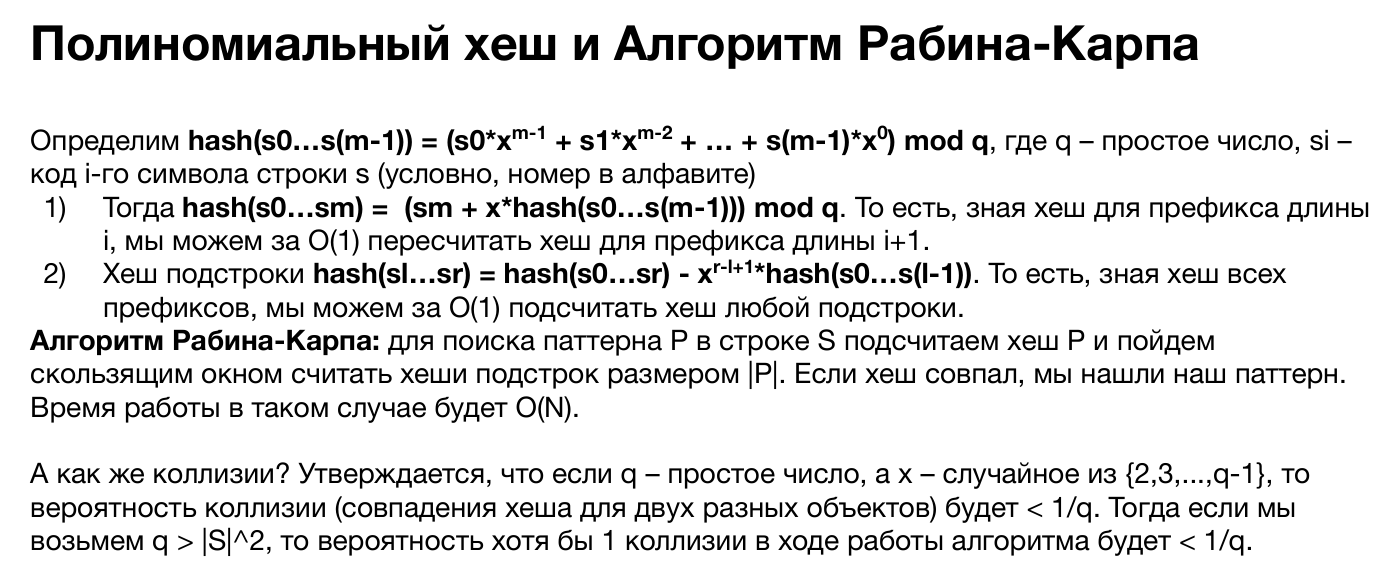

In [78]:
import hashlib

def hash_string(s):
    return hashlib.sha256(s.encode()).hexdigest()

def find_period_hashlib(s):
    n = len(s)
    for p in range(1, n):  # Перебираем возможные длины периода
        if n % p == 0:  # Период возможен только если длина делится на p
            base_hash = hash_string(s[:p])  # Хеш первой подстроки длины p
            ok = True
            
            for i in range(p, n, p):  # Проверяем, совпадают ли все части
                if hash_string(s[i:i + p]) != base_hash:
                    ok = False
                    break
            
            if ok:
                return p  # Нашли минимальный период

    return n  # Если нет меньшего периода, строка сама себе период

print(find_period_hashlib("ababab"))  
print(find_period_hashlib("aaaaaa"))    
print(find_period_hashlib("abcabcabc"))   
print(find_period_hashlib("abcdef")) 

2
1
3
6


In [80]:
import hashlib

def hash_string(s):
    return hashlib.sha256(s.encode()).hexdigest()

def kmp_hashlib_search(text, pattern):
    n, m = len(text), len(pattern)
    pattern_hash = hash_string(pattern)  # Хеш паттерна
    result = []

    for i in range(n - m + 1):  # Перебираем все возможные сдвиги
        if hash_string(text[i:i + m]) == pattern_hash:
            if text[i:i + m] == pattern:  # Дополнительная проверка (на случай коллизий)
                result.append(i)

    return result

text = "aaabaabaaab"
pattern = "aab"
positions = kmp_hashlib_search(text, pattern)
print("Паттерн найден в позициях", positions)

Паттерн найден в позициях [1, 4, 8]


### Задача

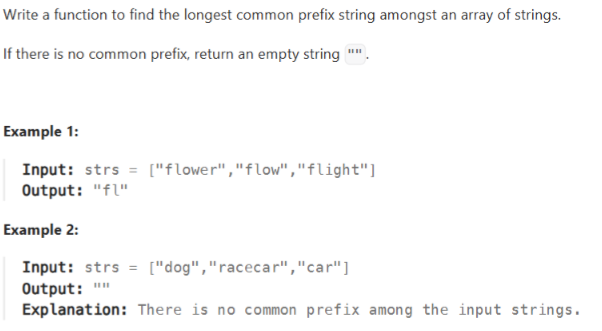

## Алгоритм Ахо-Корасика

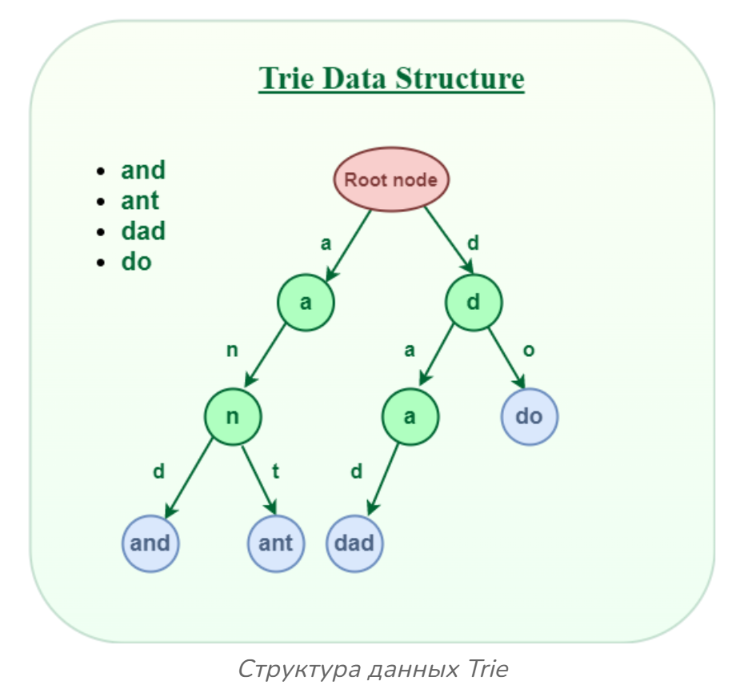

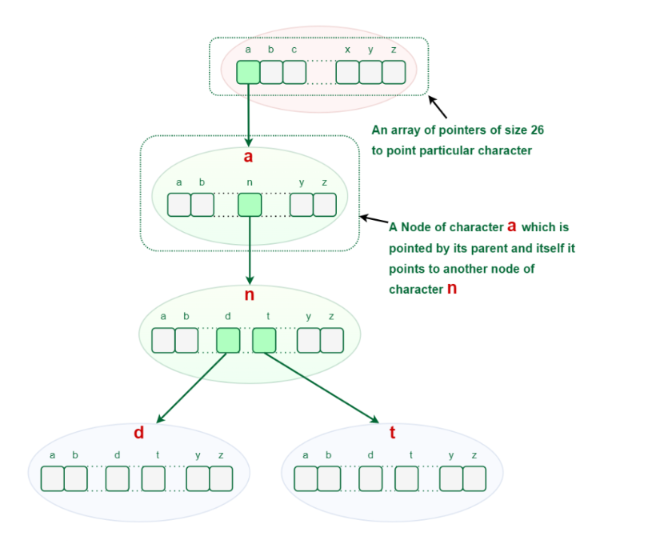

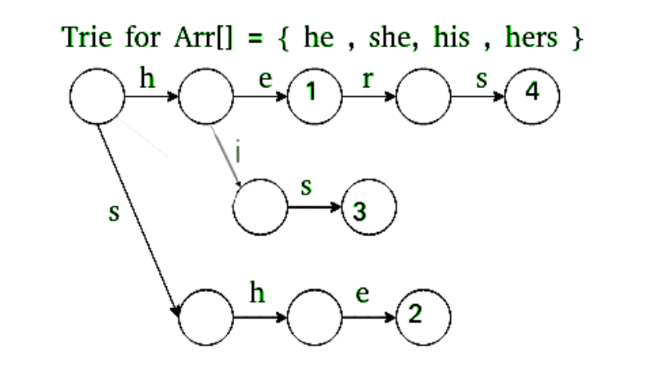

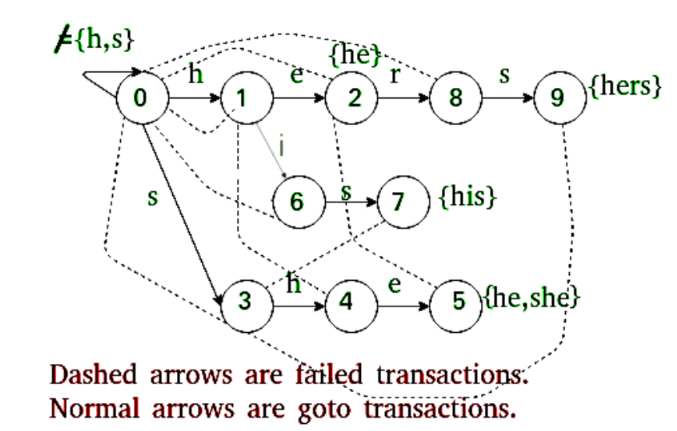

Представьте, что вы ищете слово в книге. Вы начинаете с первой страницы и читаете слово за словом, пока не найдете то, что ищете. Но что если слово, которое вы ищете, не на этой странице? Вы не будете возвращаться к первой странице и начинать заново, правда)? Вы будете переворачивать страницу и продолжать поиск на следующей странице.

Для корня (state=0) функция неудачи всегда указывает на себя.

Для других состояний вычисляется через BFS (поиск в ширину):

Находим состояние-родитель (откуда пришли)

Берем fail-состояние родителя

Ищем переход по текущему символу из этого fail-состояния

Если перехода нет, продолжаем подниматься по fail-цепочке

Когда находим переход или доходим до корня - это и будет наше fail-состояние

Пример:
Для шаблонов ["he", "she", "his", "hers"]:

Состояние "h" → fail = 0 (корень)

Состояние "he" → fail указывает на состояние "e" в "she" (если оно есть)

Состояние "her" → fail указывает на "er" (если есть такой префикс)

Это позволяет при несовпадении продолжать поиск с наиболее длинного частичного совпадения

In [16]:
from collections import defaultdict

class AhoCorasick:
    def __init__(self, words):
        self.words = [word.lower() for word in words]
        self._build_machine()

    def _build_machine(self):
        self.goto = [defaultdict(int)] 
        self.fail = [0]  # функция неудачи
        self.out = [[] for i in range(1)]  
        
        # Построение trie-дерева
        for i, word in enumerate(self.words):
            state = 0
            for ch in word:
                if ch not in self.goto[state]:
                    self.goto[state][ch] = len(self.goto)
                    self.goto.append(defaultdict(int))
                    self.fail.append(0)
                    self.out.append([])
                state = self.goto[state][ch]
            self.out[state].append(i)  # сохраняем индекс слова
        
        # Построение функции неудачи с помощью BFS
        queue = []
        # Для корня (state=0) устанавливаем переходы для всех символов, которых нет в детях
        for ch, state in self.goto[0].items():
            queue.append(state)
            self.fail[state] = 0
        
        while queue:
            current = queue.pop(0)
            for ch, state in self.goto[current].items():
                queue.append(state)
                # Ищем самое длинное совпадающее окончание
                fail_state = self.fail[current]
                while fail_state != 0 and ch not in self.goto[fail_state]:
                    fail_state = self.fail[fail_state]
                self.fail[state] = self.goto[fail_state].get(ch, 0)
                # Добавляем выходы из fail-состояния
                self.out[state].extend(self.out[self.fail[state]])

    def search(self, text):
        text = text.lower()
        current_state = 0
        result = defaultdict(list)
        
        for pos, ch in enumerate(text):
            # Переход с использованием функции неудачи, если нет прямого перехода
            while current_state != 0 and ch not in self.goto[current_state]:
                current_state = self.fail[current_state]
            current_state = self.goto[current_state].get(ch, 0)
            
            # Добавляем все совпадения в текущем состоянии
            for word_idx in self.out[current_state]:
                word = self.words[word_idx]
                start = pos - len(word) + 1
                result[word].append(start)
        
        return result

if __name__ == "__main__":
    words = ["he", "she", "hers", "his"]
    text = "ahishers"
    ac = AhoCorasick(words)
    matches = ac.search(text)
    for word, positions in matches.items():
        for start in positions:
            print(f"Слово '{word}' найдено с {start} по {start + len(word) - 1}")

Слово 'his' найдено с 1 по 3
Слово 'she' найдено с 3 по 5
Слово 'he' найдено с 4 по 5
Слово 'hers' найдено с 4 по 7
